In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'Bank Customer Churn/Bank_Churn.csv')

In [3]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 13)

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48
Exited,10000.0,2.037000e-01,0.402769,0.00,0.00,0.000000e+00,0.000000e+00,1.00


In [6]:
numerical_col = df.select_dtypes(include=['number']).columns
numerical_col

Index(['CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

## Data Cleaning

In [7]:
# Seeing how many duplicated values are there
df.duplicated().sum()

0

In [8]:
# Looking for any Null values
df.isnull().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
# Removing unimportant columns
df.drop(columns=['Surname', 'CustomerId'], inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


## EDA

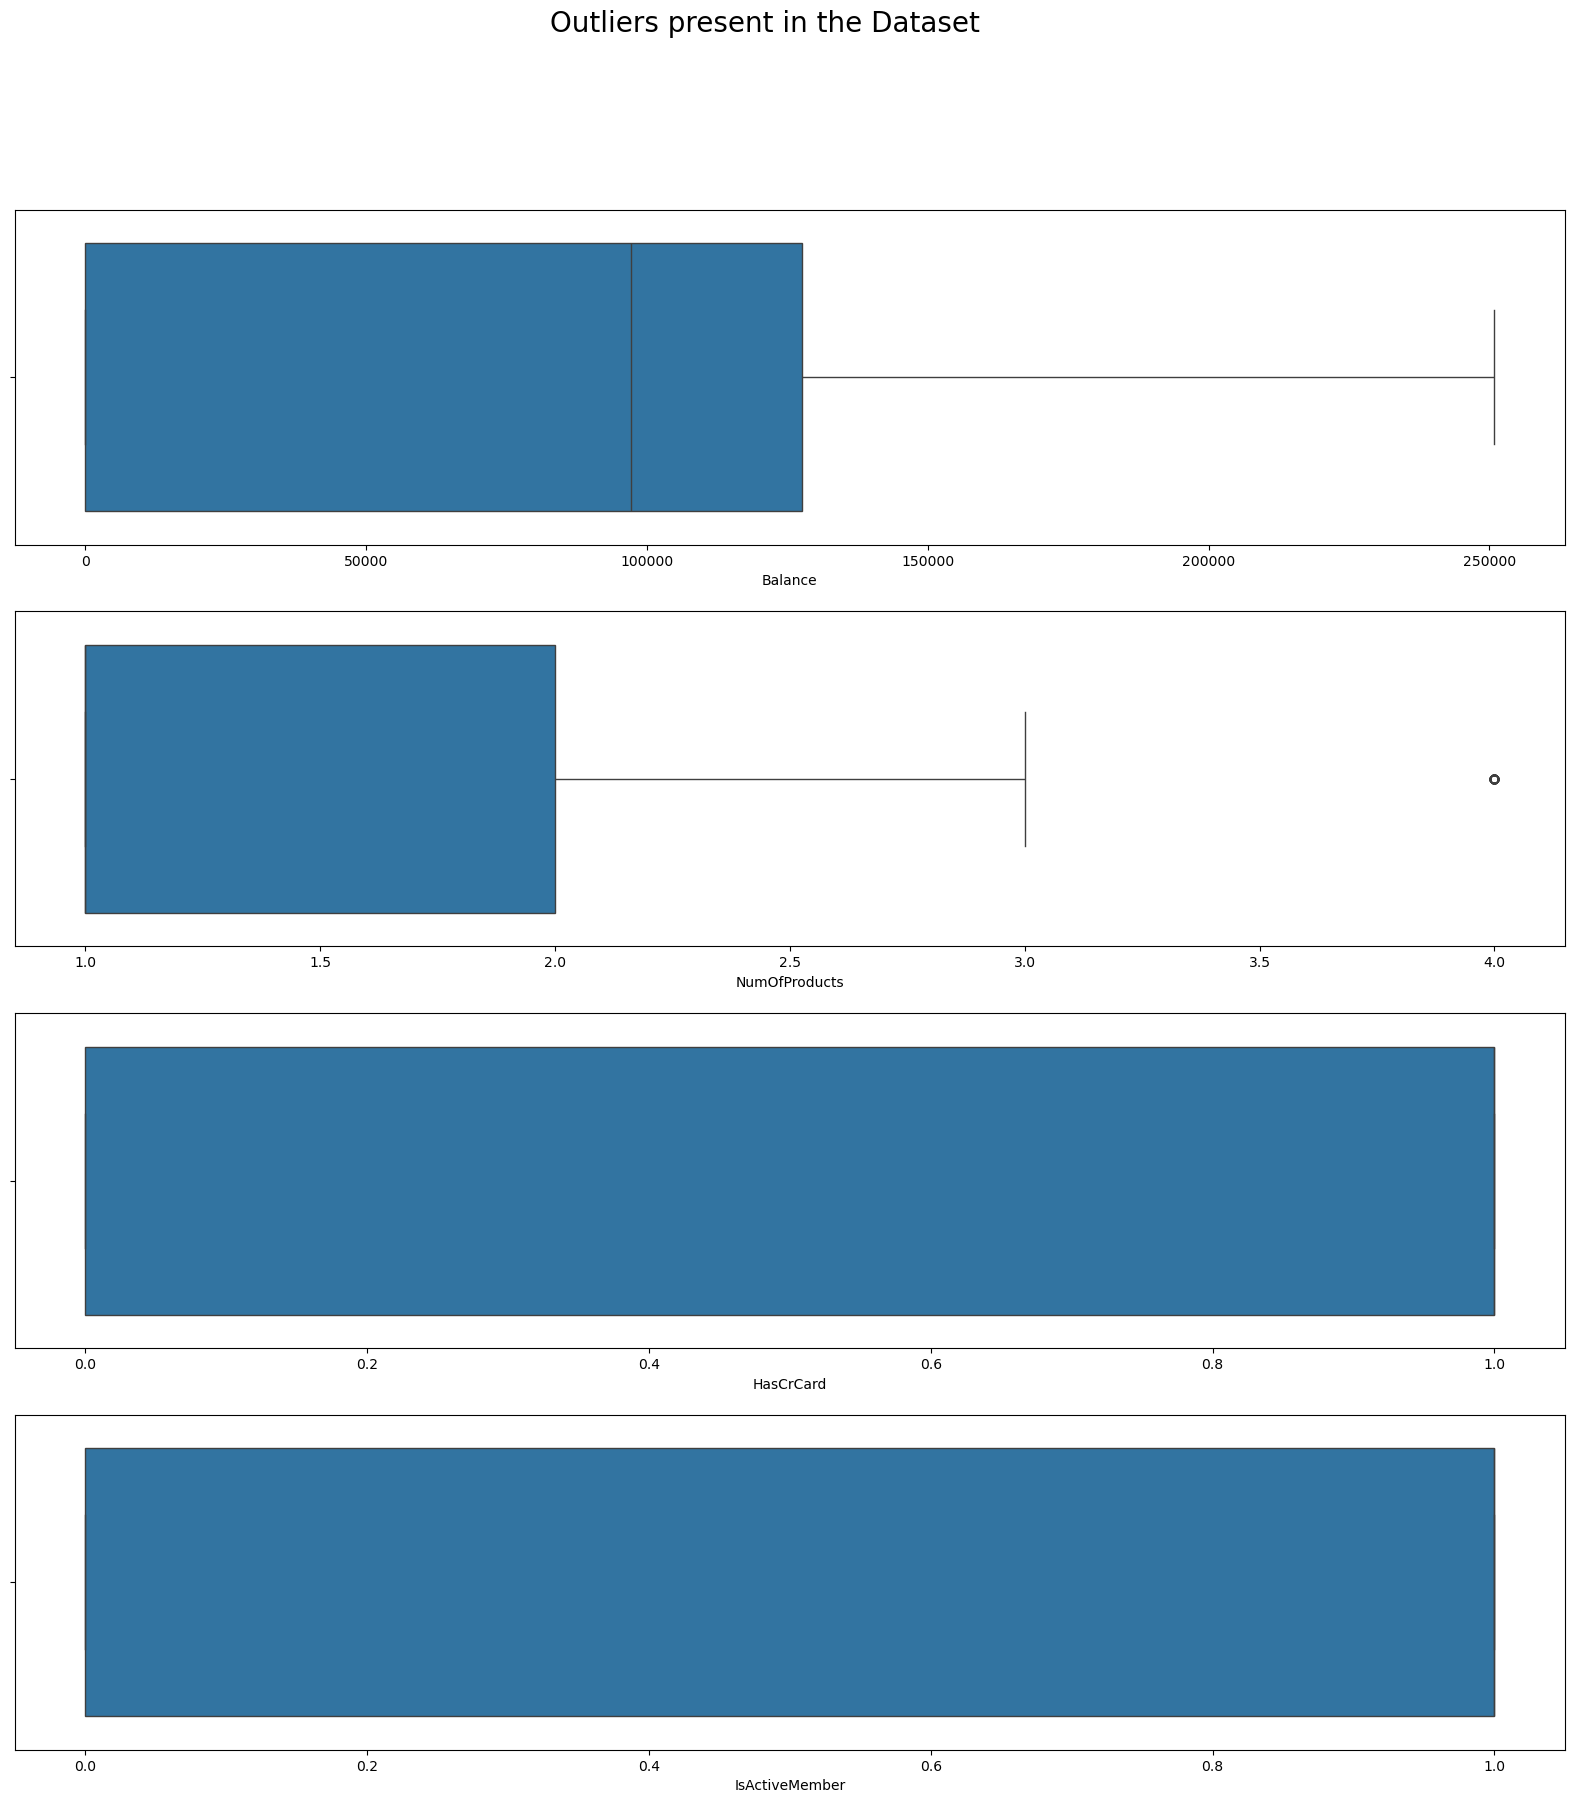

In [11]:
# Checking for Outliers
f,a = plt.subplots(4,1, figsize=(20,20), dpi=100)
sns.boxplot(x=df['Balance'], ax=a[0])
sns.boxplot(x=df['NumOfProducts'], ax=a[1])
sns.boxplot(x=df['HasCrCard'], ax=a[2])
sns.boxplot(x=df['IsActiveMember'], ax=a[3])
plt.suptitle('Outliers present in the Dataset', fontsize=20)
plt.show()

In [12]:
# Removing the outliers in the 'NumOfProducts' column by changing the outlier value to median
df.loc[df['NumOfProducts'] > 3, 'NumOfProducts'] = df['NumOfProducts'].quantile(0.5)

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.512200,0.550528,1.00,1.00,1.000,2.0000,3.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


<Axes: xlabel='NumOfProducts'>

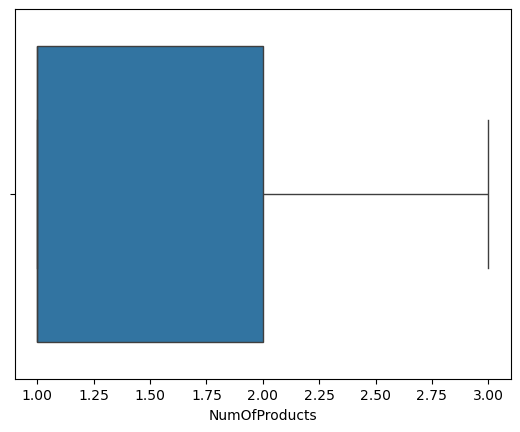

In [14]:
sns.boxplot(x=df['NumOfProducts'])

<Axes: xlabel='Exited', ylabel='count'>

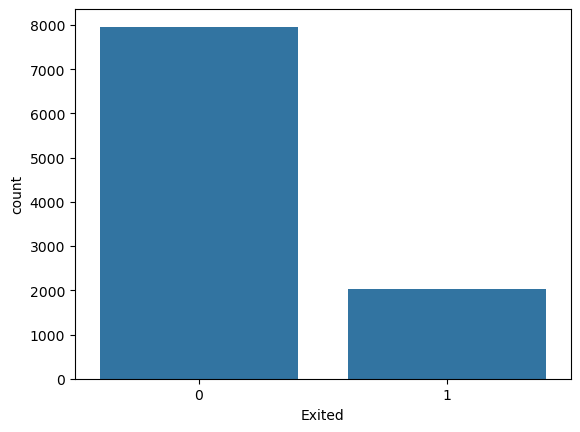

In [15]:
# Number of values in both classes of Exited column
sns.countplot(x = df['Exited'])

<Axes: xlabel='Exited', ylabel='Age'>

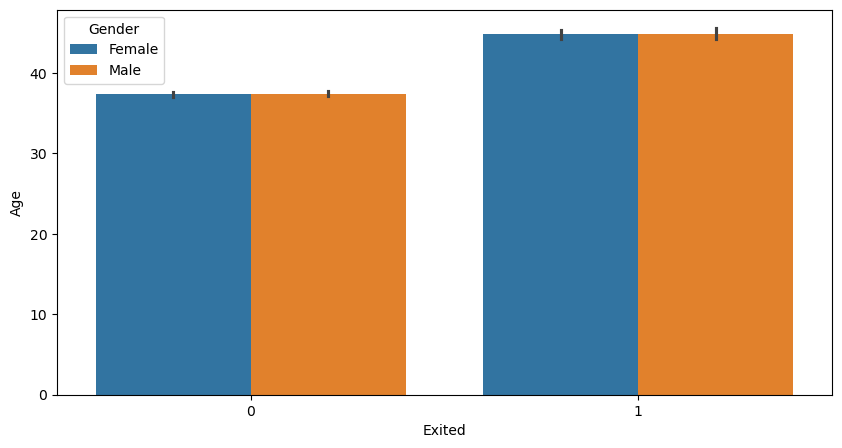

In [16]:
plt.figure(figsize=(10,5))
sns.barplot(data=df, x=df['Exited'], y=df['Age'], hue=df['Gender'])

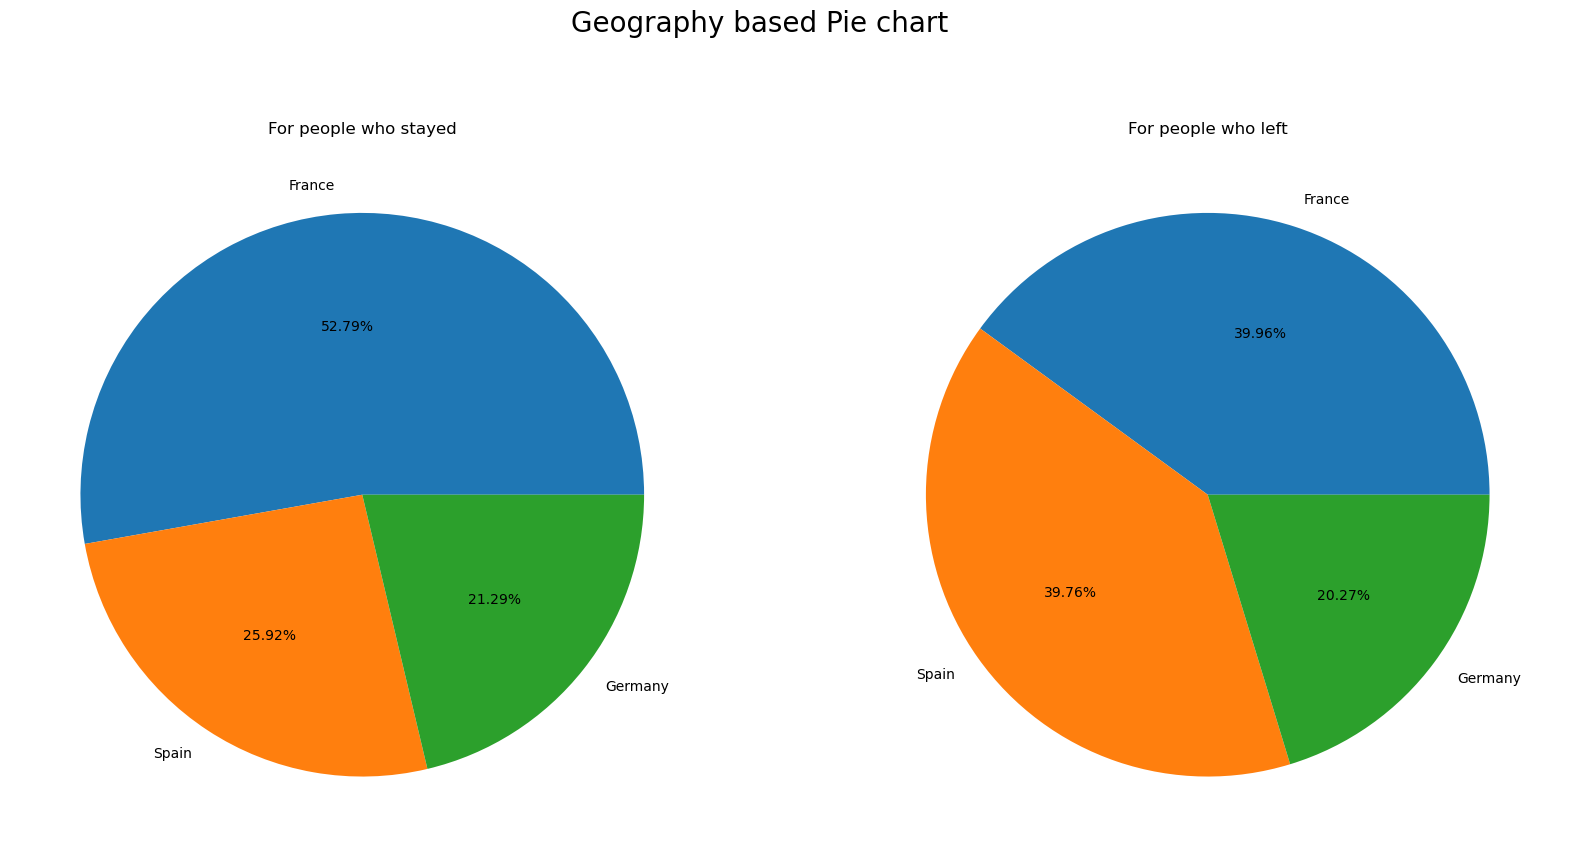

In [17]:
df0 = df[df['Exited'] == 0]
df1 = df[df['Exited'] == 1]

plt.figure(figsize=(20,10), dpi = 100)
plt.subplot(121)
plt.pie(df0['Geography'].value_counts(), labels = df['Geography'].unique(), autopct = '%.2f%%')
plt.title('For people who stayed')

plt.subplot(122)
plt.pie(df1['Geography'].value_counts(), labels = df['Geography'].unique(), autopct = '%.2f%%')
plt.title('For people who left')

plt.suptitle('Geography based Pie chart', fontsize = 20)
plt.show()

<Axes: xlabel='IsActiveMember', ylabel='Exited'>

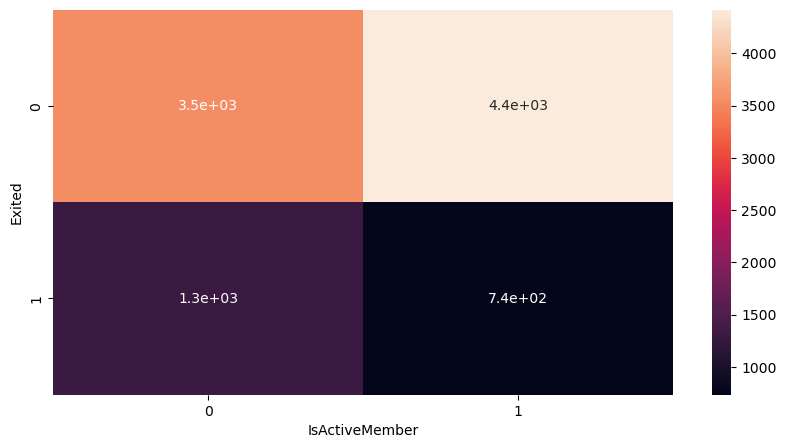

In [18]:
plt.figure(figsize=(10,5))
sns.heatmap(pd.crosstab(df['Exited'], df['IsActiveMember']), annot=True)

<Axes: xlabel='Exited', ylabel='EstimatedSalary'>

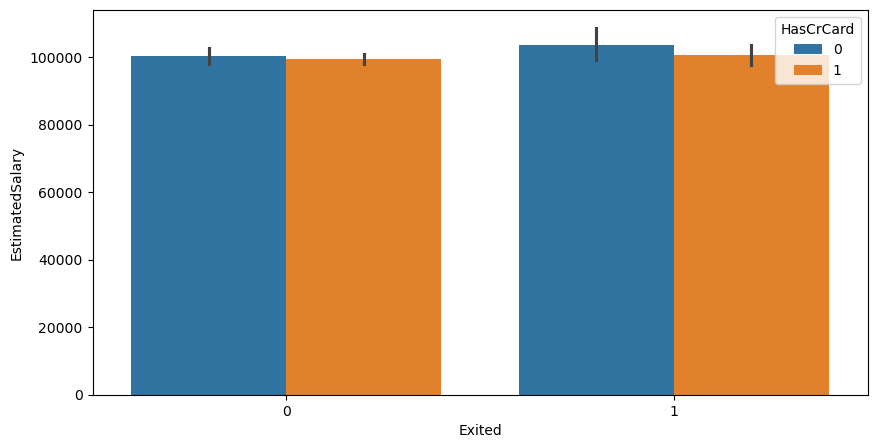

In [19]:
plt.figure(figsize=(10,5))
sns.barplot(data=df, x=df['Exited'], y=df['EstimatedSalary'], hue=df['HasCrCard'])

In [20]:
df.sample(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9132,635,France,Female,33,5,0.00,2,1,0,122949.71,0
5180,569,Spain,Male,43,8,161546.68,2,0,1,178187.28,0
4708,530,Spain,Male,44,6,0.00,2,0,0,55893.37,0
6655,554,France,Male,44,7,85304.27,1,1,1,58076.52,0
6612,502,France,Female,64,3,139663.37,1,0,1,100995.11,0
2512,734,France,Male,51,1,118537.47,1,1,1,116912.45,0
7195,675,France,Female,33,6,0.00,2,1,0,34045.61,0
2845,599,Germany,Male,45,10,103583.05,1,1,0,132127.69,1
1650,625,France,Male,34,6,0.00,2,0,0,197283.20,0
4661,780,France,Female,43,0,0.00,1,0,1,15705.27,0


Text(0.5, 1.0, 'Balance of People that left')

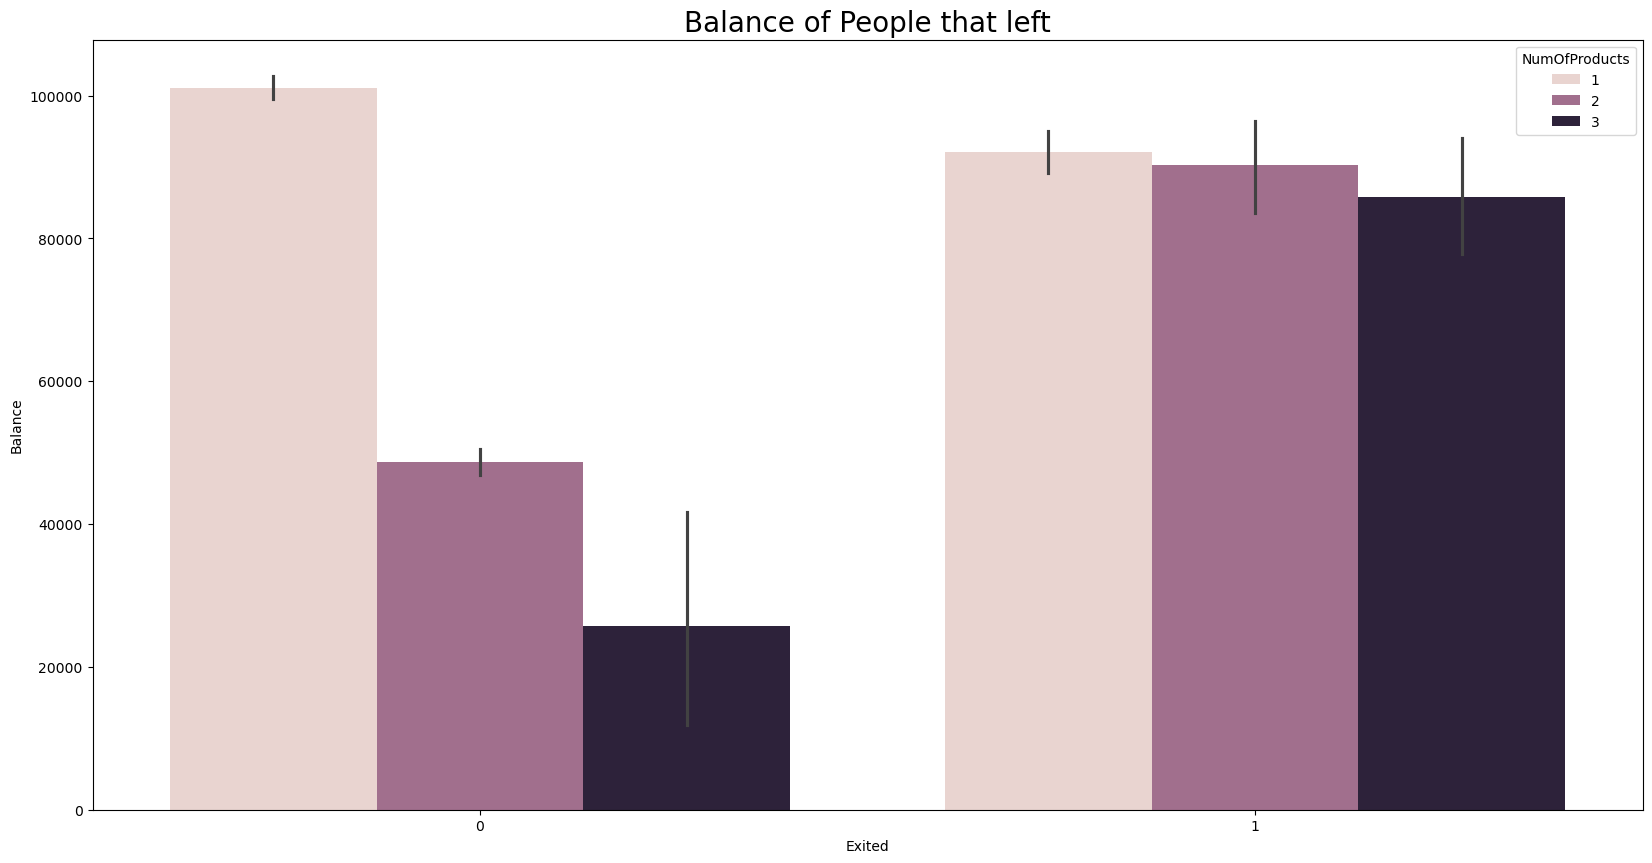

In [21]:
plt.figure(figsize=(20,10))
sns.barplot(data=df, x=df['Exited'], y=df['Balance'], hue=df['NumOfProducts'])
plt.title('Balance of People that left', fontsize = 20)

Text(0.5, 1.0, 'Tenure of Customers that left')

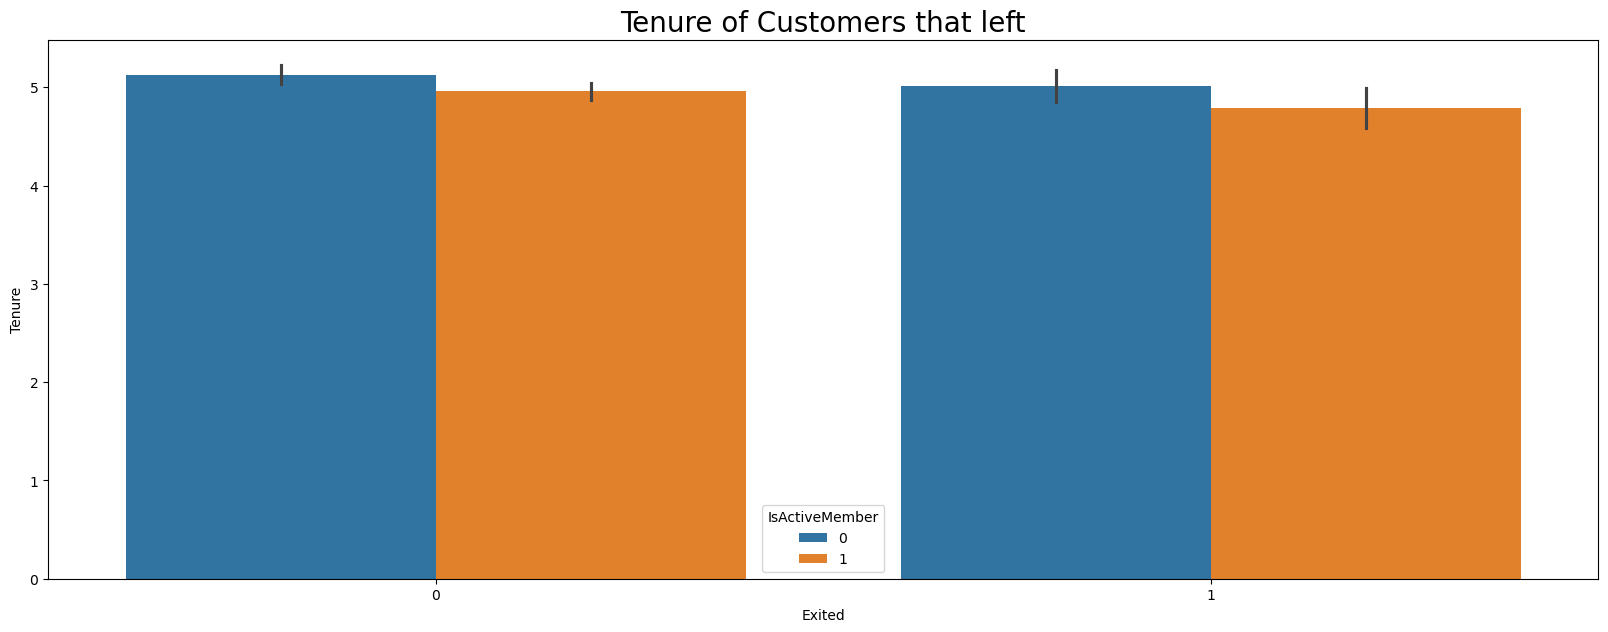

In [22]:
plt.figure(figsize=(20,7))
sns.barplot(data=df, x=df['Exited'], y=df['Tenure'], hue=df['IsActiveMember'])
plt.title('Tenure of Customers that left', fontsize = 20)

Text(0.5, 1.0, 'Credit Score of Customers that left')

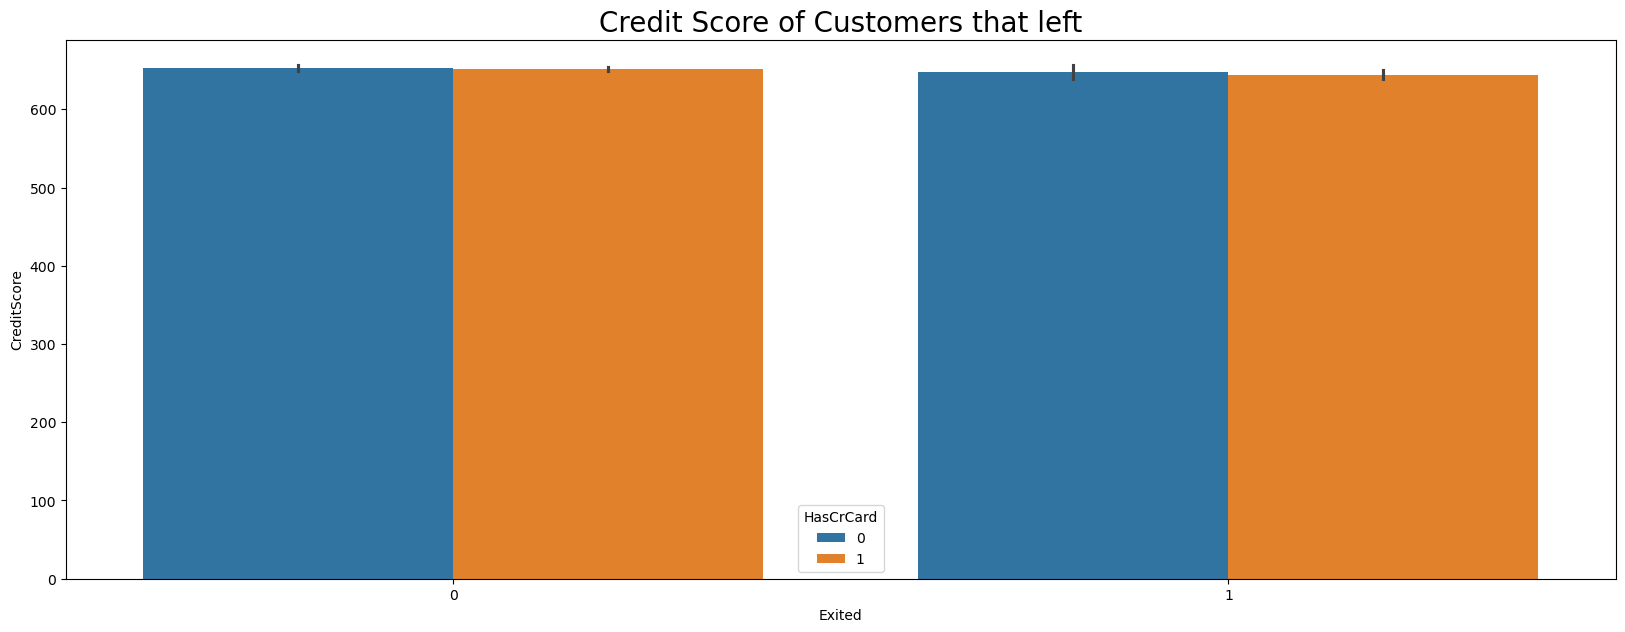

In [23]:
plt.figure(figsize=(20,7))
sns.barplot(data=df, x=df['Exited'], y=df['CreditScore'], hue = df['HasCrCard'])
plt.title('Credit Score of Customers that left', fontsize = 20)

<Axes: >

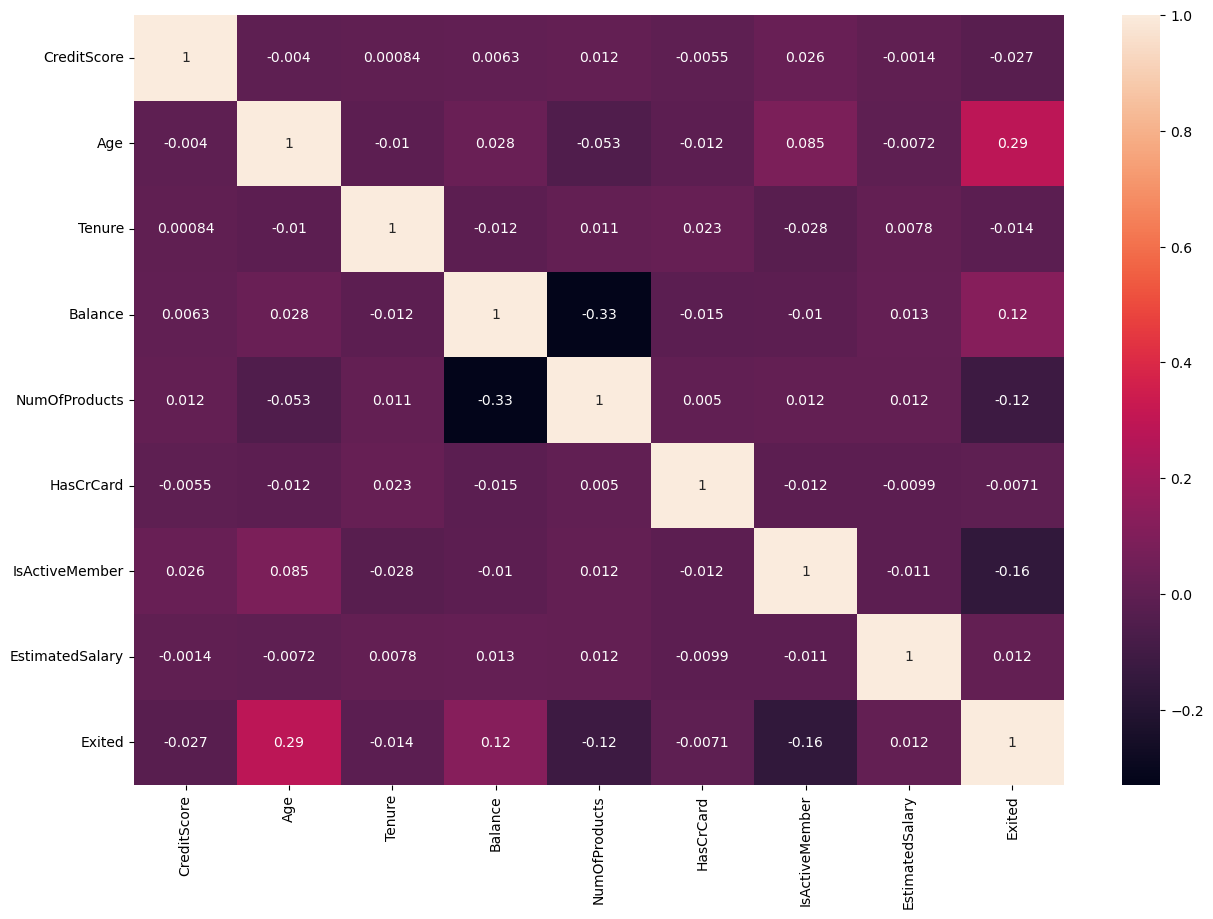

In [24]:
# Checking the Correlation
correlation = df.corr(numeric_only=True)

# Generating HeatMap
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(numeric_only=True), annot=True)

## Feature Engineering

In [25]:
x = df.drop(columns=['Exited'])
y = df['Exited']

In [26]:
x

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [27]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [28]:
scaler = StandardScaler()

In [29]:
features_to_scale = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

In [30]:
x[features_to_scale] = scaler.fit_transform(x[features_to_scale])
x

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,-0.326221,France,Female,0.293517,-1.041760,-1.225848,-0.930425,1,1,0.021886
1,-0.440036,Spain,Female,0.198164,-1.387538,0.117350,-0.930425,0,1,0.216534
2,-1.536794,France,Female,0.293517,1.032908,1.333053,2.702630,1,0,0.240687
3,0.501521,France,Female,0.007457,-1.387538,-1.225848,0.886102,0,0,-0.108918
4,2.063884,Spain,Female,0.388871,-1.041760,0.785728,-0.930425,1,1,-0.365276
...,...,...,...,...,...,...,...,...,...,...
9995,1.246488,France,Male,0.007457,-0.004426,-1.225848,0.886102,1,0,-0.066419
9996,-1.391939,France,Male,-0.373958,1.724464,-0.306379,-0.930425,1,1,0.027988
9997,0.604988,France,Female,-0.278604,0.687130,-1.225848,-0.930425,0,1,-1.008643
9998,1.256835,Germany,Male,0.293517,-0.695982,-0.022608,0.886102,1,0,-0.125231


In [31]:
# Now Applying One-Hot-Encoding on the catagorical columns
x = pd.get_dummies(x, columns = ['Geography', 'Gender'])
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,-0.326221,0.293517,-1.041760,-1.225848,-0.930425,1,1,0.021886,True,False,False,True,False
1,-0.440036,0.198164,-1.387538,0.117350,-0.930425,0,1,0.216534,False,False,True,True,False
2,-1.536794,0.293517,1.032908,1.333053,2.702630,1,0,0.240687,True,False,False,True,False
3,0.501521,0.007457,-1.387538,-1.225848,0.886102,0,0,-0.108918,True,False,False,True,False
4,2.063884,0.388871,-1.041760,0.785728,-0.930425,1,1,-0.365276,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.246488,0.007457,-0.004426,-1.225848,0.886102,1,0,-0.066419,True,False,False,False,True
9996,-1.391939,-0.373958,1.724464,-0.306379,-0.930425,1,1,0.027988,True,False,False,False,True
9997,0.604988,-0.278604,0.687130,-1.225848,-0.930425,0,1,-1.008643,True,False,False,True,False
9998,1.256835,0.293517,-0.695982,-0.022608,0.886102,1,0,-0.125231,False,True,False,False,True


## Data Modelling & Evaluation

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 101)

In [33]:
# Applying Logistic Regression
logreg = LogisticRegression()

In [34]:
logreg.fit(x_train, y_train)

LogisticRegression()

In [35]:
# For the Training data
y_train_pred_logreg = logreg.predict(x_train)

In [36]:
print(classification_report(y_train, y_train_pred_logreg))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      6386
           1       0.61      0.22      0.32      1614

    accuracy                           0.81      8000
   macro avg       0.72      0.59      0.61      8000
weighted avg       0.79      0.81      0.78      8000



In [37]:
# For the Testing data
y_test_pred_logreg = logreg.predict(x_test)

In [38]:
print(classification_report(y_test, y_test_pred_logreg))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1577
           1       0.65      0.22      0.32       423

    accuracy                           0.81      2000
   macro avg       0.74      0.59      0.61      2000
weighted avg       0.79      0.81      0.77      2000



In [39]:
# Applying KNN
knn = KNeighborsClassifier()

In [40]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [41]:
# Accuracy for Train data
y_train_pred_knn = knn.predict(x_train)
print(accuracy_score(y_train, y_train_pred_knn))

0.879875


In [42]:
# Accuracy for Test data
y_test_pred_knn = knn.predict(x_test)
print(accuracy_score(y_test, y_test_pred_knn))

0.831


In [43]:
print(classification_report(y_test, y_test_pred_knn))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90      1577
           1       0.65      0.44      0.52       423

    accuracy                           0.83      2000
   macro avg       0.76      0.69      0.71      2000
weighted avg       0.82      0.83      0.82      2000



In [44]:
param_grid = {
    'max_depth' : [10, 20, 30, 40, 50, None],
    'min_samples_leaf' : [1, 2, 3, 4, 5],
    'min_samples_split' : [2, 4, 6, 8, 10]
}

# Initialize the Classifier
dtc = DecisionTreeClassifier(random_state = 101)
rfc = RandomForestClassifier(random_state = 101)

grid_search_dtc = GridSearchCV(estimator = dtc, param_grid = param_grid, cv = 5, n_jobs = -1, verbose = 2)
grid_search_rfc = GridSearchCV(estimator = rfc, param_grid = param_grid, cv = 5, n_jobs = -1, verbose = 2)

grid_search_dtc.fit(x_train, y_train)
grid_search_rfc.fit(x_train, y_train)

# Get the Best estimator from the grid search
best_dtc = grid_search_dtc.best_estimator_
best_rfc = grid_search_rfc.best_estimator_

y_pred_dtc = best_dtc.predict(x_test)
y_pred_rfc = best_rfc.predict(x_test)

Fitting 5 folds for each of 150 candidates, totalling 750 fits
Fitting 5 folds for each of 150 candidates, totalling 750 fits


In [45]:
# Accuracy Score for Decision Tree Classifier
accuracy_score(y_test, y_pred_dtc)

0.846

In [46]:
print(classification_report(y_test, y_pred_dtc))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      1577
           1       0.67      0.54      0.60       423

    accuracy                           0.85      2000
   macro avg       0.78      0.73      0.75      2000
weighted avg       0.84      0.85      0.84      2000



In [47]:
# Accuracy Score for Random Forest Classifier
accuracy_score(y_test, y_pred_rfc)

0.869

In [48]:
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1577
           1       0.79      0.52      0.63       423

    accuracy                           0.87      2000
   macro avg       0.84      0.74      0.77      2000
weighted avg       0.86      0.87      0.86      2000



In [49]:
# Creating a Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rfc)
cm

array([[1518,   59],
       [ 203,  220]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix')

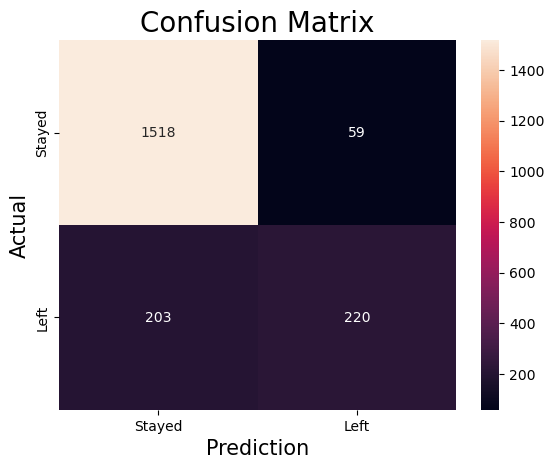

In [50]:
sns.heatmap(cm, fmt='g', xticklabels = ['Stayed', 'Left'], yticklabels = ['Stayed', 'Left'], annot = True)
plt.ylabel('Actual', fontsize=15)
plt.xlabel('Prediction', fontsize=15)
plt.title('Confusion Matrix', fontsize = 20)

# Dealing with Imbalance DATA

In [51]:
# The data we have is imbalanced so we are going to apply SMOTE technique to fix that
# and then see how it affects our prediction
from imblearn.over_sampling import SMOTE

In [52]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 101)

In [53]:
y_train

6861    0
9881    0
4536    0
8430    0
6765    0
       ..
599     0
5695    0
8006    0
1361    0
1547    0
Name: Exited, Length: 8000, dtype: int64

In [54]:
# Applying SMOTE
smote = SMOTE(random_state = 42)
x_resampled_smote, y_resampled_smote = smote.fit_resample(x_train, y_train)

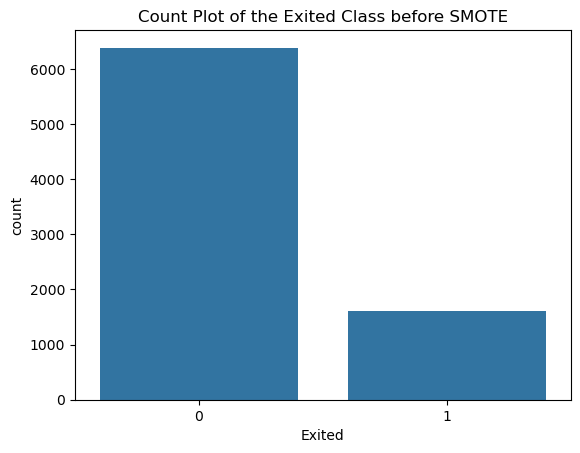

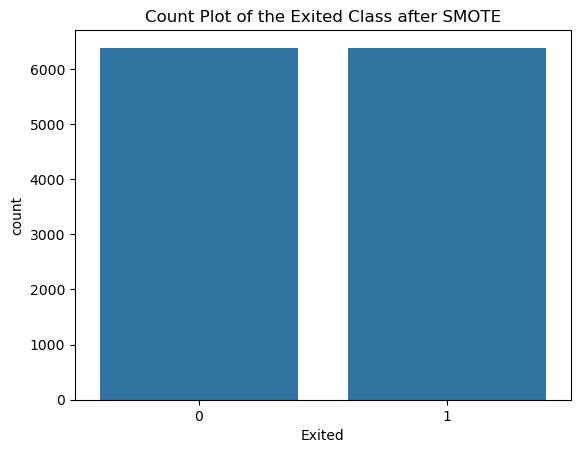

In [55]:
# Plotting
sns.countplot(x = y_train)
plt.title('Count Plot of the Exited Class before SMOTE')
plt.show()

sns.countplot(x = y_resampled_smote)
plt.title('Count Plot of the Exited Class after SMOTE')
plt.show()

In [56]:
x_train.shape

(8000, 13)

In [57]:
x_resampled_smote.shape

(12772, 13)

In [58]:
pd.Series(y_resampled_smote).value_counts()

Exited
0    6386
1    6386
Name: count, dtype: int64

In [59]:
# NOW TRAINING THE MODELS ON THIS RESAMPLED DATASET

In [60]:
# Applying Logistic Regression
logreg = LogisticRegression()
logreg.fit(x_resampled_smote, y_resampled_smote)

LogisticRegression()

In [61]:
y_resampled_pred_logreg = logreg.predict(x_test)

In [62]:
print(classification_report(y_test, y_resampled_pred_logreg))

              precision    recall  f1-score   support

           0       0.89      0.76      0.82      1577
           1       0.42      0.65      0.51       423

    accuracy                           0.73      2000
   macro avg       0.65      0.70      0.66      2000
weighted avg       0.79      0.73      0.75      2000



In [63]:
# Applying KNN
knn = KNeighborsClassifier()
knn.fit(x_resampled_smote, y_resampled_smote)

KNeighborsClassifier()

In [64]:
y_resampled_pred_knn = knn.predict(x_test)
print(classification_report(y_test, y_resampled_pred_knn))

              precision    recall  f1-score   support

           0       0.90      0.78      0.84      1577
           1       0.45      0.68      0.54       423

    accuracy                           0.76      2000
   macro avg       0.68      0.73      0.69      2000
weighted avg       0.81      0.76      0.77      2000



In [65]:
param_grid = {
    'max_depth' : [10, 20, 30, 40, 50, None],
    'min_samples_leaf' : [1, 2, 3, 4, 5],
    'min_samples_split' : [2, 4, 6, 8, 10]
}

# Initialize the Classifier
dtc = DecisionTreeClassifier(random_state = 42)
rfc = RandomForestClassifier(random_state = 42)

grid_search_dtc = GridSearchCV(estimator = dtc, param_grid = param_grid, cv = 5, n_jobs = -1, verbose = 2)
grid_search_rfc = GridSearchCV(estimator = rfc, param_grid = param_grid, cv = 5, n_jobs = -1, verbose = 2)

grid_search_dtc.fit(x_resampled_smote, y_resampled_smote)
grid_search_rfc.fit(x_resampled_smote, y_resampled_smote)

# Get the Best estimator from the grid search
best_dtc = grid_search_dtc.best_estimator_
best_rfc = grid_search_rfc.best_estimator_

y_resampled_pred_dtc = best_dtc.predict(x_test)
y_resampled_pred_rfc = best_rfc.predict(x_test)

Fitting 5 folds for each of 150 candidates, totalling 750 fits
Fitting 5 folds for each of 150 candidates, totalling 750 fits


In [66]:
# For Decision Tree Classifier
print(classification_report(y_test, y_resampled_pred_dtc))

              precision    recall  f1-score   support

           0       0.88      0.81      0.85      1577
           1       0.46      0.60      0.52       423

    accuracy                           0.77      2000
   macro avg       0.67      0.70      0.68      2000
weighted avg       0.79      0.77      0.78      2000



In [67]:
# For Random Forest Classifier
print(classification_report(y_test, y_resampled_pred_rfc))

              precision    recall  f1-score   support

           0       0.90      0.89      0.90      1577
           1       0.61      0.65      0.63       423

    accuracy                           0.84      2000
   macro avg       0.76      0.77      0.76      2000
weighted avg       0.84      0.84      0.84      2000



Text(0.5, 1.0, 'Confusion Matrix')

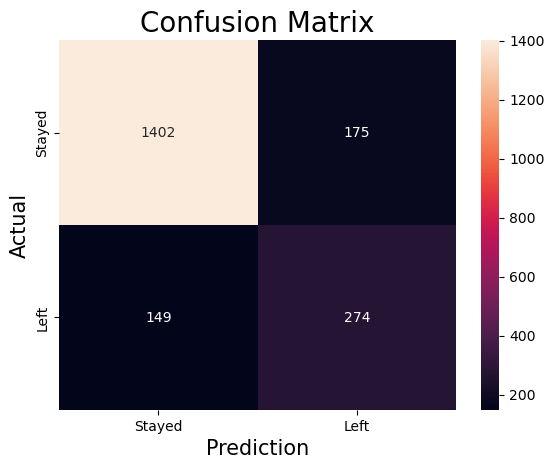

In [68]:
# Creating a Confusion Matrix
cm = confusion_matrix(y_test, y_resampled_pred_rfc)
sns.heatmap(cm, fmt='g', xticklabels = ['Stayed', 'Left'], yticklabels = ['Stayed', 'Left'], annot = True)
plt.ylabel('Actual', fontsize=15)
plt.xlabel('Prediction', fontsize=15)
plt.title('Confusion Matrix', fontsize = 20)